In [44]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import math

In [45]:
t=1

In [46]:
def comparision(t):
    plt.figure(figsize=(15,15))
    liver=temp_data=pd.read_csv(rf"..\GenerateFigures\Figures\{"liver"}\Day_{t}\r2_0.9\{"liver"}_day_{t}_fsr.csv")
    # liver=liver.query('Protein in ["CH60_MOUSE","AATM_MOUSE"]')
    print('liver',liver.shape)
    heart=temp_data=pd.read_csv(rf"..\GenerateFigures\Figures\{"heart"}\Day_{t}\r2_0.9\{"heart"}_day_{t}_fsr.csv")
    # heart=heart.query('Protein in ["CH60_MOUSE","AATM_MOUSE"]')
    print('heart',heart.shape)

    merged=pd.merge(liver[['Protein', 'Peptide', 'Charge','I0_0_exp', 'i0_t_exp']],
            heart[['Protein', 'Peptide', 'Charge','I0_0_exp', 'i0_t_exp']],
            on=['Protein', 'Peptide', 'Charge'],
            suffixes=['_liver','_heart'])
    print('merged',merged.shape)

    merged['liver_dif']=merged.I0_0_exp_liver-merged.i0_t_exp_liver
    merged['heart_dif']=merged.I0_0_exp_heart-merged.i0_t_exp_heart

    sns.jointplot(data=merged , x="liver_dif", y="heart_dif",color='k',alpha=0.6)
    plt.plot(merged.liver_dif,merged.liver_dif,ls=':',c='r')
    
    plt.ylabel(  r'$ I_{0}(0)^{exp} - I_{0}(t)^{exp}, Heart $' )
    plt.xlabel(  r'$ I_{0}(0)^{exp} - I_{0}(t)^{exp}, Liver $' )
    plt.tight_layout()
    plt.savefig(f"All_Liver_Heart_AATM_CH60_Day_{t}_.jpeg",dpi=600)

    plt.show()

liver (7694, 14)
heart (4693, 14)
merged (1444, 7)


<Figure size 1500x1500 with 0 Axes>

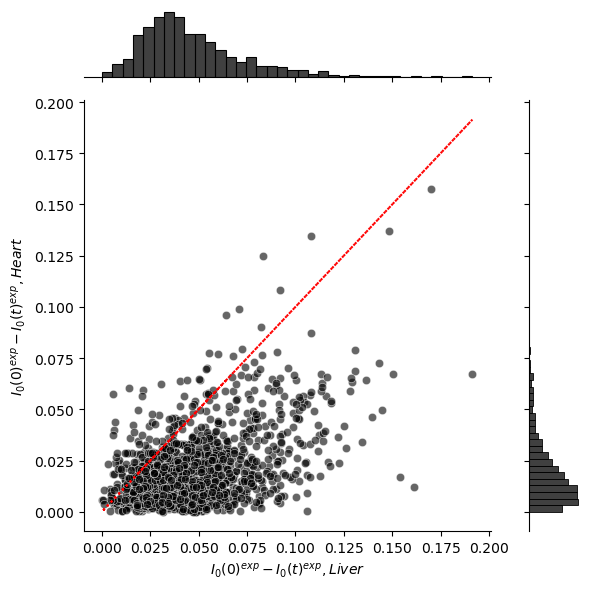

liver (7807, 14)
heart (5255, 14)
merged (1628, 7)


<Figure size 1500x1500 with 0 Axes>

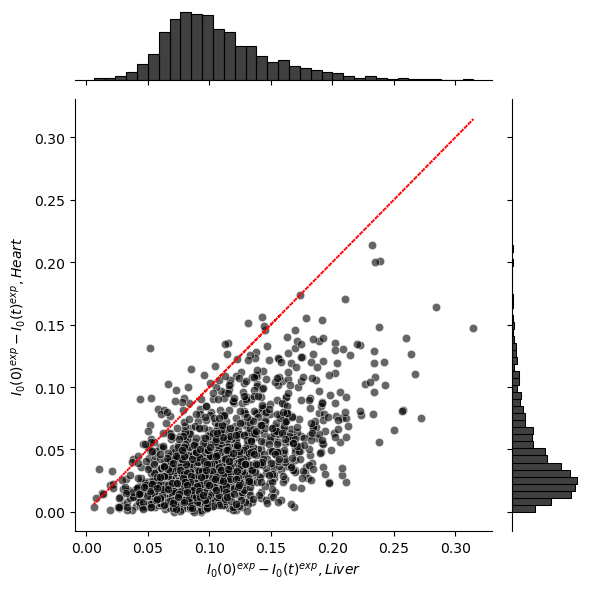

liver (7459, 14)
heart (5343, 14)
merged (1611, 7)


<Figure size 1500x1500 with 0 Axes>

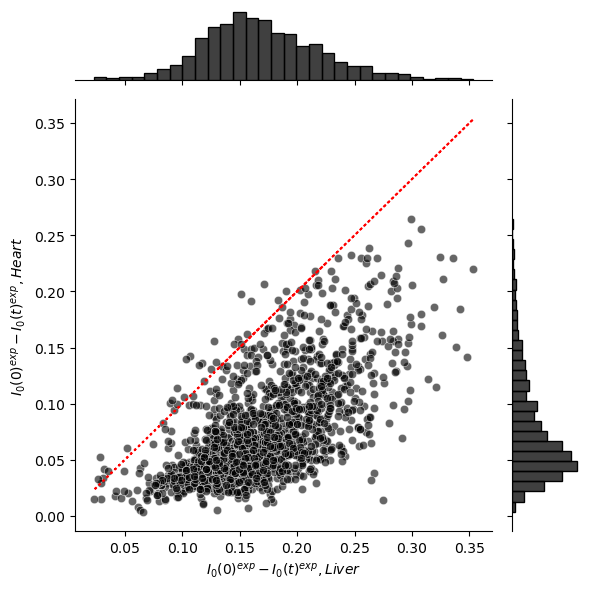

In [47]:
comparision(1)
comparision(3)
comparision(6)